In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('train (9).csv')

In [7]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
df.shape

(7352, 563)

In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [13]:
x = df.drop(columns='Activity')

In [14]:
y = df['Activity']

In [15]:
le = LabelEncoder()

In [17]:
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 5, 5, 5], shape=(7352,))

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)

(5881, 562)
(1471, 562)


In [23]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
y_pred=log_reg.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.982324949014276


In [24]:
y_pred_train=log_reg.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
print(acc_train)

0.9930283965312022


# 1. Duplicated Values 

In [28]:
x_train.T.duplicated().sum()

np.int64(21)

In [29]:
dup=x_train.T.duplicated()
dup

tBodyAcc-mean()-X                       False
tBodyAcc-mean()-Y                       False
tBodyAcc-mean()-Z                       False
tBodyAcc-std()-X                        False
tBodyAcc-std()-Y                        False
                                        ...  
angle(tBodyGyroJerkMean,gravityMean)    False
angle(X,gravityMean)                    False
angle(Y,gravityMean)                    False
angle(Z,gravityMean)                    False
subject                                 False
Length: 562, dtype: bool

In [30]:
list(x_train.columns[dup])

['tBodyAccMag-sma()',
 'tGravityAccMag-mean()',
 'tGravityAccMag-std()',
 'tGravityAccMag-mad()',
 'tGravityAccMag-max()',
 'tGravityAccMag-min()',
 'tGravityAccMag-sma()',
 'tGravityAccMag-energy()',
 'tGravityAccMag-iqr()',
 'tGravityAccMag-entropy()',
 'tGravityAccMag-arCoeff()1',
 'tGravityAccMag-arCoeff()2',
 'tGravityAccMag-arCoeff()3',
 'tGravityAccMag-arCoeff()4',
 'tBodyAccJerkMag-sma()',
 'tBodyGyroMag-sma()',
 'tBodyGyroJerkMag-sma()',
 'fBodyAccMag-sma()',
 'fBodyBodyAccJerkMag-sma()',
 'fBodyBodyGyroMag-sma()',
 'fBodyBodyGyroJerkMag-sma()']

In [31]:
x_train.drop(columns=list(x_train.columns[dup])).shape

(5881, 541)

In [32]:
x_train.columns[dup]

Index(['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tGravityAccMag-sma()', 'tGravityAccMag-energy()',
       'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()',
       'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2',
       'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4',
       'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()',
       'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()',
       'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()'],
      dtype='object')

In [33]:
L=[]

def get_duplicate_columns(d):
    duplicate_columns = d.T.duplicated()

    if duplicate_columns.any():
        print("Duplicate columns found:")
        print(d.columns[duplicate_columns])
        L.append(d.columns[duplicate_columns])
    else:
        print("No duplicate columns found.")

In [35]:
get_duplicate_columns(x_train)

Duplicate columns found:
Index(['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tGravityAccMag-sma()', 'tGravityAccMag-energy()',
       'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()',
       'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2',
       'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4',
       'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()',
       'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()',
       'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()'],
      dtype='object')


In [36]:
print(L)

[Index(['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tGravityAccMag-sma()', 'tGravityAccMag-energy()',
       'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()',
       'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2',
       'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4',
       'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()',
       'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()',
       'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()'],
      dtype='object')]


In [37]:
l=L[0]
print(l)

Index(['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tGravityAccMag-sma()', 'tGravityAccMag-energy()',
       'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()',
       'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2',
       'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4',
       'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()',
       'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()',
       'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()'],
      dtype='object')


In [38]:
print(x_train.shape)

(5881, 562)


In [39]:
x_train.drop(columns=l,inplace=True)
x_test.drop(columns=l,inplace=True)

In [40]:
print(x_train.shape)
print(x_test.shape)

(5881, 541)
(1471, 541)


# 2. Variance Threshold

In [41]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [42]:
sel.fit(x_train)

,threshold,0.05


In [43]:
sel.get_support()

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,

In [44]:
sum(sel.get_support())


np.int64(350)

In [45]:
col=x_train.columns[sel.get_support()]
col

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=350)

In [46]:
# dropping those columns the variance is lesser than threshold value

x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

In [47]:
x_train

array([[-9.9442540e-01, -9.9487263e-01, -9.9488582e-01, ...,
        -5.4671715e-01, -4.3119994e-01,  1.0000000e+00],
       [-3.2633148e-01,  6.9662799e-02, -2.2432128e-01, ...,
         3.8316244e-01,  2.3896924e-01,  2.1000000e+01],
       [-2.6219969e-02, -3.2163061e-02,  3.9310852e-01, ...,
         2.2154911e-01, -3.5709056e-03,  2.9000000e+01],
       ...,
       [-6.2719763e-01, -2.1656585e-01, -4.2476369e-01, ...,
         1.8354749e-01, -3.4938575e-02,  2.5000000e+01],
       [-9.9482480e-01, -9.8531367e-01, -9.6585729e-01, ...,
         8.1388034e-02, -9.8270240e-02,  5.0000000e+00],
       [-3.6865452e-01, -1.4263084e-01, -1.5125003e-01, ...,
         1.8822594e-01,  2.7440533e-03,  3.0000000e+01]],
      shape=(5881, 350))

In [48]:
x_train = pd.DataFrame(x_train, columns=col)
x_test = pd.DataFrame(x_test, columns=col)

In [49]:
x_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200,1.0
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969,21.0
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571,29.0
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246,3.0
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,-0.077885,-0.373579,0.454289,...,0.417731,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944,25.0
5877,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,-0.017039,-0.123285,0.123907,...,-0.021970,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746,25.0
5878,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,-0.236201,-0.441355,0.530629,...,0.527152,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939,25.0
5879,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,-0.570198,-0.805684,0.849776,...,-0.889671,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270,5.0


In [50]:
x_train.columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=350)

# 3. Correlation

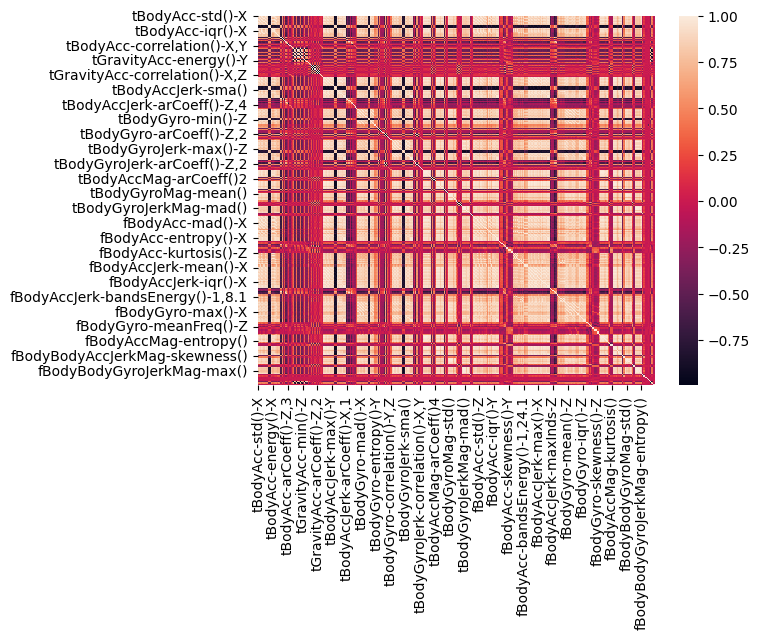

In [51]:
sns.heatmap(x_train.corr());

In [52]:
corr_matrix = x_train.corr()
corr_matrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209,-0.067715
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180,-0.119283
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824,-0.049923
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139,-0.066568
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548,-0.118213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311,0.001765
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642,0.031829
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205,-0.012919
"angle(Z,gravityMean)",0.393209,0.432180,0.480824,0.389139,0.430548,0.477627,0.404088,0.424181,0.416249,-0.392253,...,0.054520,0.049765,-0.004092,-0.014265,-0.011178,-0.009311,-0.642642,0.596205,1.000000,-0.099749


In [53]:
# to get the columns names of the DataFrame
columns = corr_matrix.columns

# create an empty list to keep track of columns to drop
columns_to_drop = []


for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        
        
        # Acces the cell of the DataFrame 
        if corr_matrix.loc[columns[i], columns[j]] > 0.95 :
            columns_to_drop.append(columns[j])
            
print(len(columns_to_drop))

1508


In [54]:
corr_matrix.columns[0]

'tBodyAcc-std()-X'

In [55]:
corr_matrix.loc['tBodyAcc-std()-X','tBodyAcc-std()-Y']

np.float64(0.9272470414048349)

In [56]:
columns_to_drop = set(columns_to_drop)
print(len(columns_to_drop))

197


In [57]:
x_train.drop(columns=columns_to_drop, axis =1, inplace = True)
x_test.drop(columns=columns_to_drop, axis =1, inplace = True)

In [58]:
print(x_train.shape)
print(x_test.shape)

(5881, 153)
(1471, 153)


# 4. Anova

In [59]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=100).fit(x_train, y_train)

# display selected feature names
x_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [60]:
columns = x_train.columns[sel.get_support()]

In [61]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

x_train = pd.DataFrame(x_train, columns=columns)
x_test = pd.DataFrame(x_test, columns=columns)

In [62]:
print(x_train.shape)
print(x_test.shape)

(5881, 100)
(1471, 100)


In [63]:
x_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,-0.158283,-0.999962,0.172414,-0.986305,0.132640,-0.690000,-0.024257,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.315738,-0.898022,-0.517241,-0.718822,0.144767,-0.316666,0.191186,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.071045,0.192158,-0.793103,-0.290424,-0.088077,-0.270995,-0.431985,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,-0.629423,-0.996263,-0.931034,-0.997886,-0.027783,-0.651181,-0.567748,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.261846,-0.999927,-1.000000,-0.988139,0.668020,-0.598248,-0.257360,-0.615329,0.322236,0.161577


# Moment of Truth 

In [64]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(x_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9694085656016316
